In [496]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [497]:
data = pd.read_csv("task.csv")           # call data from excel_file 
data.head()     # show the first 5 rows by default ____ you can pass number that you want 

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,5/2/2014 0:00,313000.0,3.0,1.50,1340.0,7912.0,1.5,0.0,0.0,3.0,1340.0,0.0,1955.0,2005.0,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5/2/2014 0:00,2384000.0,5.0,2.50,3650.0,9050.0,2.0,0.0,4.0,5.0,3370.0,280.0,1921.0,0.0,709 W Blaine St,Seattle,WA 98119,USA
2,5/2/2014 0:00,342000.0,3.0,2.00,1930.0,11947.0,1.0,0.0,0.0,4.0,1930.0,0.0,1966.0,0.0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,5/2/2014 0:00,420000.0,3.0,2.25,2000.0,8030.0,1.0,0.0,0.0,4.0,1000.0,1000.0,1963.0,0.0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5/2/2014 0:00,550000.0,4.0,2.50,1940.0,10500.0,1.0,0.0,0.0,4.0,1140.0,800.0,1976.0,1992.0,9105 170th Ave NE,Redmond,WA 98052,USA


In [498]:
data = data.dropna()  # drop null values
data.info()     # show more information about data  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4463 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4463 non-null   object 
 1   price          4463 non-null   float64
 2   bedrooms       4463 non-null   float64
 3   bathrooms      4463 non-null   float64
 4   sqft_living    4463 non-null   float64
 5   sqft_lot       4463 non-null   float64
 6   floors         4463 non-null   float64
 7   waterfront     4463 non-null   float64
 8   view           4463 non-null   float64
 9   condition      4463 non-null   float64
 10  sqft_above     4463 non-null   float64
 11  sqft_basement  4463 non-null   float64
 12  yr_built       4463 non-null   float64
 13  yr_renovated   4463 non-null   float64
 14  street         4463 non-null   object 
 15  city           4463 non-null   object 
 16  statezip       4463 non-null   object 
 17  country        4463 non-null   object 
dtypes: float

In [499]:
model = LinearRegression()     # model 
x = data.drop(["price","date","street","city","statezip","country"],axis = 1)     
# x = all data except the value the will be predicted and (data with type object) (axis = 1 to drop the columns)
y = data["price"]      # value that will be predicted 
model.fit(x,y)        # fit data
model.score(x,y)      # compute accurecy 

0.21460359592917655

In [500]:
data.describe()    # describe data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.463000e+03,4463.000000,4463.000000,4463.000000,4.463000e+03,4463.000000,4463.000000,4463.000000,4463.000000,4463.000000,4463.000000,4463.000000,4463.000000
mean,5.522416e+05,3.401972,2.161607,2140.686982,1.494376e+04,1.512884,0.007394,0.241542,3.453058,1829.038987,311.647995,1970.773023,807.045037
std,5.698124e+05,0.907272,0.786128,965.966742,3.620514e+04,0.536647,0.085680,0.782143,0.678464,865.396796,464.416483,29.778290,979.096167
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.219750e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549750e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,605.000000,1997.000000,1999.000000
max,2.659000e+07,8.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [501]:
data[data==0].count()      # data with value 0 in each column
# waterfront , view  >> have large number of (0) but (real data) 
# price : problem (no house without price )

date                0
price              49
bedrooms            2
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront       4430
view             4018
condition           0
sqft_above          0
sqft_basement    2665
yr_built            0
yr_renovated     2657
street              0
city                0
statezip            0
country             0
dtype: int64

In [502]:
data = data[data["price"]!=0]      # drop the price with value 0 

In [503]:
data[data==0].count()         # count  after dropping price_data == 0  

date                0
price               0
bedrooms            2
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront       4384
view             3981
condition           0
sqft_above          0
sqft_basement    2638
yr_built            0
yr_renovated     2628
street              0
city                0
statezip            0
country             0
dtype: int64

In [504]:
data = data[data["bedrooms"]!=0]    # drop  bedrooms_data with value (0)
data = data[data["bathrooms"]!=0]    # drop  bathrooms  _data with value (0)

In [505]:
data[data==0].count()  

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       4382
view             3980
condition           0
sqft_above          0
sqft_basement    2636
yr_built            0
yr_renovated     2628
street              0
city                0
statezip            0
country             0
dtype: int64

In [506]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.412000e+03,4412.000000,4412.000000,4412.000000,4.412000e+03,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000
mean,5.580833e+05,3.397099,2.156618,2132.693110,1.492634e+04,1.512466,0.006800,0.235041,3.450816,1822.900499,309.792611,1970.773799,806.437217
std,5.699353e+05,0.900173,0.777343,957.812244,3.629747e+04,0.536117,0.082188,0.768524,0.676437,856.327511,462.260153,29.811812,978.986974
min,7.800000e+03,1.000000,0.750000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.259750e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.650000e+05,3.000000,2.250000,1970.000000,7.680000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.575000e+05,4.000000,2.500000,2610.000000,1.094875e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,600.000000,1997.000000,1999.000000
max,2.659000e+07,8.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [507]:
data.corr()    
# show the relation between features each others  and features with predicted value 
# to know how does featur affect on predicted value 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.209667,0.340878,0.441651,0.050068,0.152022,0.150813,0.241987,0.037968,0.377332,0.216111,0.019561,-0.025704
bedrooms,0.209667,1.000000,0.543923,0.600396,0.069114,0.181168,-0.005862,0.116730,0.022402,0.492001,0.332611,0.141480,-0.060508
bathrooms,0.340878,0.543923,1.000000,0.762359,0.108818,0.493949,0.064055,0.210551,-0.121804,0.693633,0.294682,0.465215,-0.214601
sqft_living,0.441651,0.600396,0.762359,1.000000,0.210947,0.346673,0.109214,0.310732,-0.063306,0.876015,0.449220,0.282021,-0.117744
sqft_lot,0.050068,0.069114,0.108818,0.210947,1.000000,0.005035,0.017312,0.073514,-0.000832,0.218765,0.031828,0.047759,-0.019105
floors,0.152022,0.181168,0.493949,0.346673,0.005035,1.000000,0.016084,0.033879,-0.271495,0.524874,-0.254005,0.467571,-0.238334
waterfront,0.150813,-0.005862,0.064055,0.109214,0.017312,0.016084,1.000000,0.351556,0.006017,0.073417,0.090290,-0.032404,0.016257
view,0.241987,0.116730,0.210551,0.310732,0.073514,0.033879,0.351556,1.000000,0.063017,0.175252,0.319193,-0.069319,0.027548
condition,0.037968,0.022402,-0.121804,-0.063306,-0.000832,-0.271495,0.006017,0.063017,1.000000,-0.178696,0.199859,-0.400467,-0.185339
sqft_above,0.377332,0.492001,0.693633,0.876015,0.218765,0.524874,0.073417,0.175252,-0.178696,1.000000,-0.037359,0.404777,-0.156947


<AxesSubplot:>

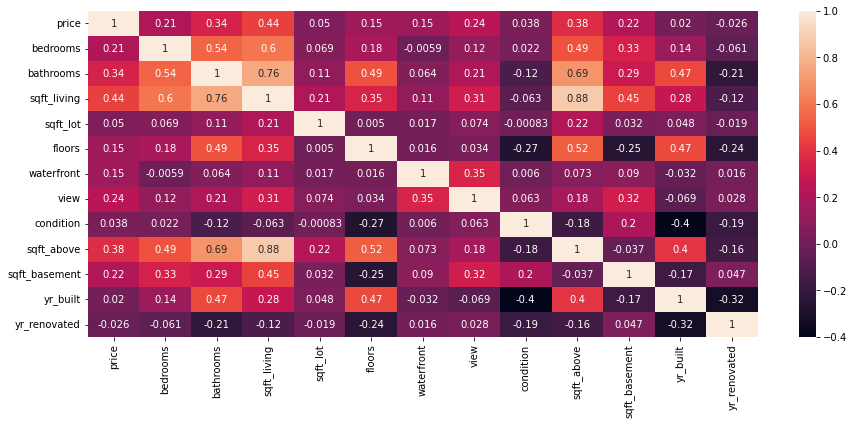

In [508]:
plt.figure(figsize=((15,6)))    # maximize figure size  
sns.heatmap(data.corr(),annot=True)    # visualization with colors

<AxesSubplot:xlabel='price', ylabel='Count'>

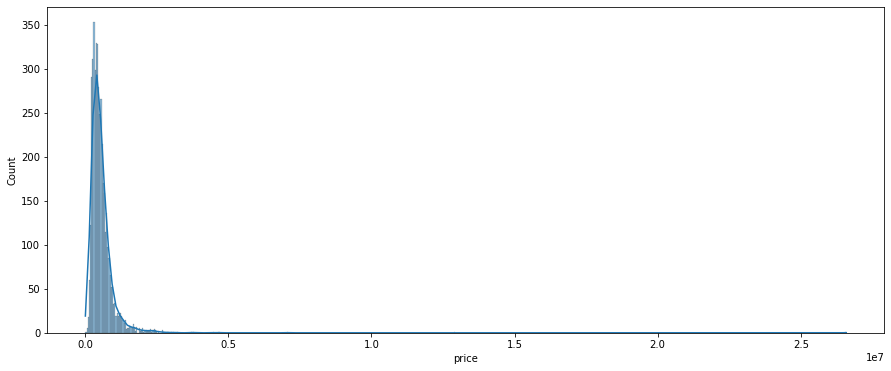

In [509]:
plt.figure(figsize=((15,6)))
sns.histplot(data["price"],kde=True)      # show distribution of price_data

In [510]:
data = data[data["price"]<.6e07]     #drop data less than 0.6e07 to handel outliers 

<AxesSubplot:xlabel='price', ylabel='Count'>

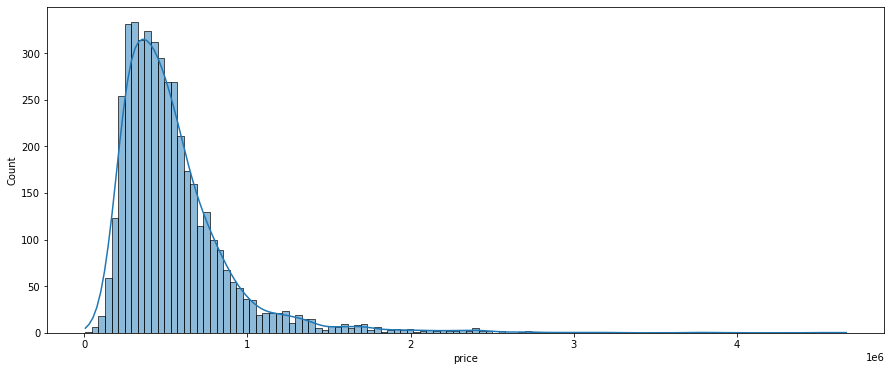

In [511]:
plt.figure(figsize=((15,6)))
sns.histplot(data["price"],kde=True)      # show distribution of price_data

c:\Users\SkyTop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

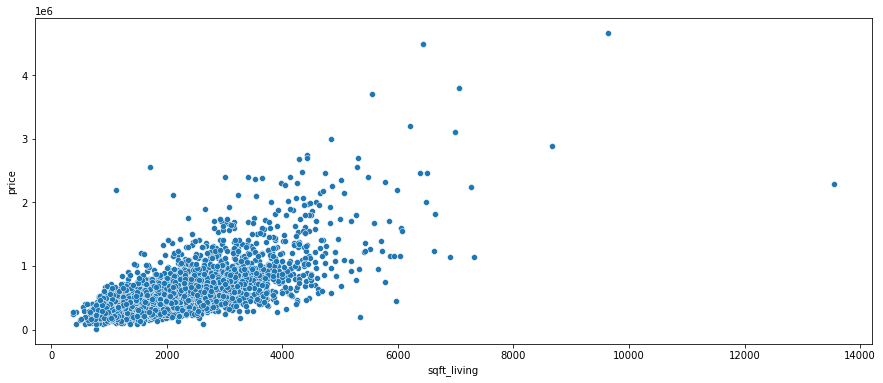

In [512]:
plt.figure(figsize=((15,6)))
sns.scatterplot(data["sqft_living"], data["price"])       
# sqft_living has outliers >> (0.44 ) affect on price
# draw the relation between it and the price 


In [513]:
data["sqft_living"] = np.where(data["sqft_living"]>6000,6000,data["sqft_living"])
# can clip (sqft_living _ data at 6000) :
# if data["sqft_living"]>6000 the data["sqft_living"] = 6000  (clip)
# else  >> data["sqft_living"]  (do nothing for data)

c:\Users\SkyTop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

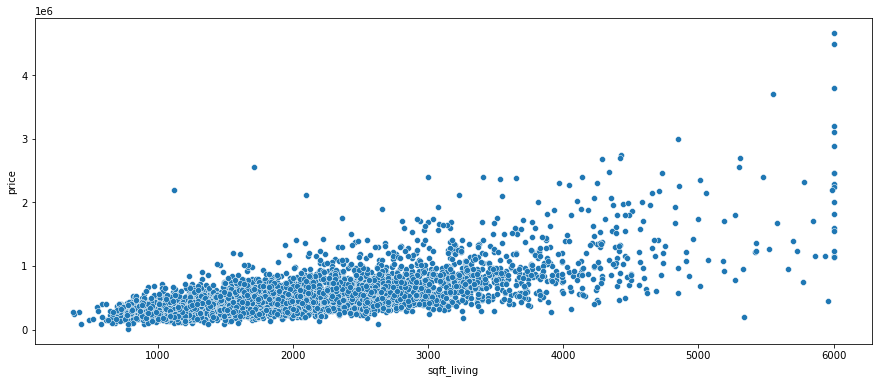

In [514]:
plt.figure(figsize=((15,6)))
sns.scatterplot(data["sqft_living"], data["price"])       
# sqft_living has outliers >> (0.44 ) affect on price
# draw the relation between it and the price   
# after clipping at 6000

c:\Users\SkyTop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

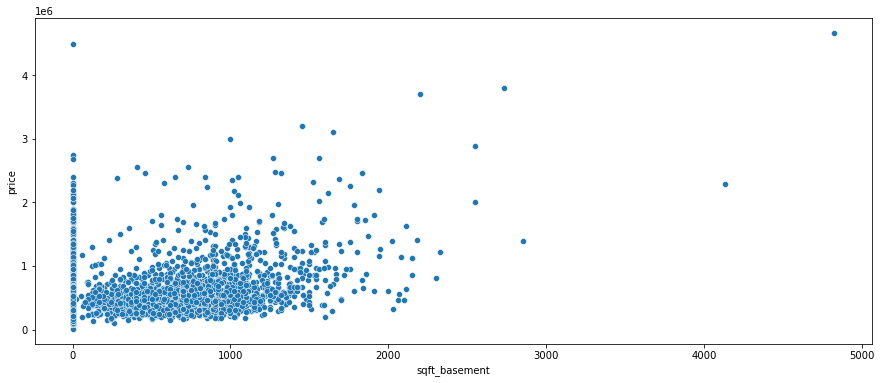

In [515]:
plt.figure(figsize=((15,6)))
sns.scatterplot(data["sqft_basement"], data["price"])  
# to show outliers in sqft_basement

In [516]:
data["sqft_basement"] = np.where(data["sqft_basement"]>2000,2000,data["sqft_basement"])
# can clip (sqft_basement data at 6000) :
# if data["sqft_basement"]>6000 the data["sqft_basement"] = 6000  (clip)
# else  >> data["sqft_basement"]  (do nothing for data)

c:\Users\SkyTop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

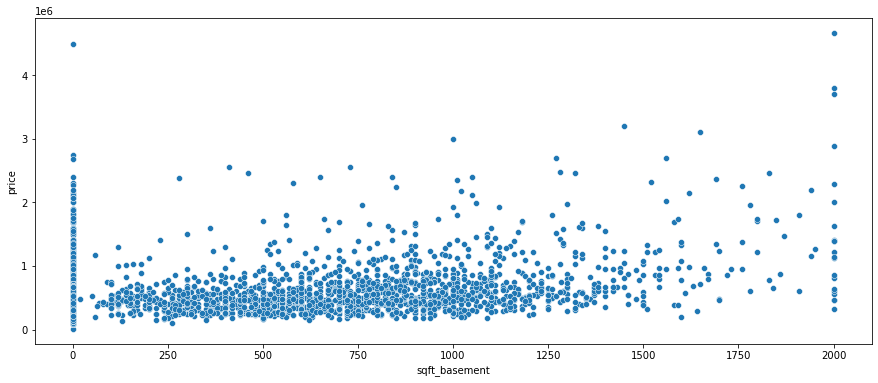

In [517]:
plt.figure(figsize=((15,6)))
sns.scatterplot(data["sqft_basement"], data["price"])  # show after clipping (sqft_basement_data) at 2000

c:\Users\SkyTop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_above', ylabel='price'>

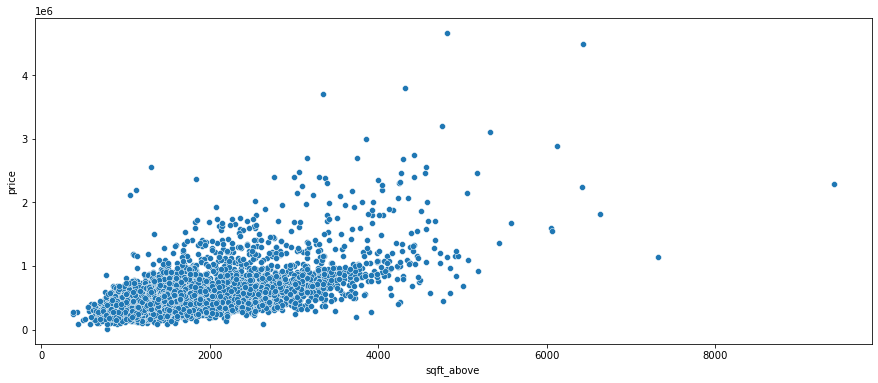

In [518]:
plt.figure(figsize=((15,6)))
sns.scatterplot(data["sqft_above"], data["price"])    # show outliers in sqft_above

In [519]:
data["sqft_above"] = np.where(data["sqft_above"]>5000,5000,data["sqft_above"])
# can clip (sqft_above data at 5000) :
# if data["sqft_above"]>5000 the data["sqft_above"] = 5000  (clip)
# else  >> data["sqft_above"]  (do nothing for data)

c:\Users\SkyTop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_above', ylabel='price'>

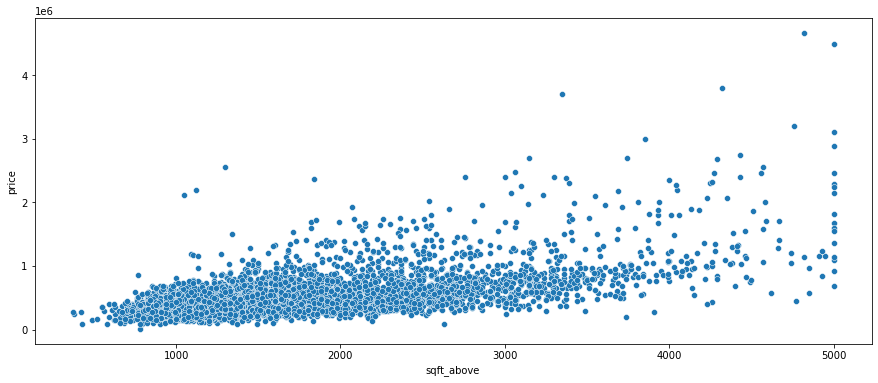

In [520]:
plt.figure(figsize=((15,6)))
sns.scatterplot(data["sqft_above"], data["price"])   # show after clipping (sqft_above_data) at 5000

c:\Users\SkyTop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='price'>

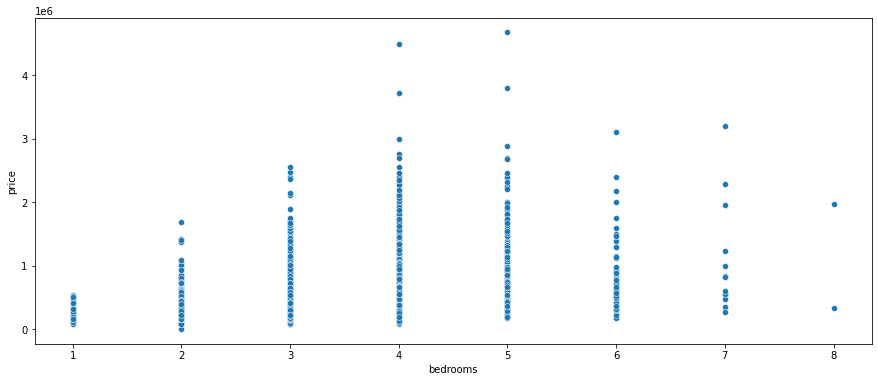

In [521]:
plt.figure(figsize=((15,6)))
sns.scatterplot(data["bedrooms"], data["price"])

c:\Users\SkyTop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='price'>

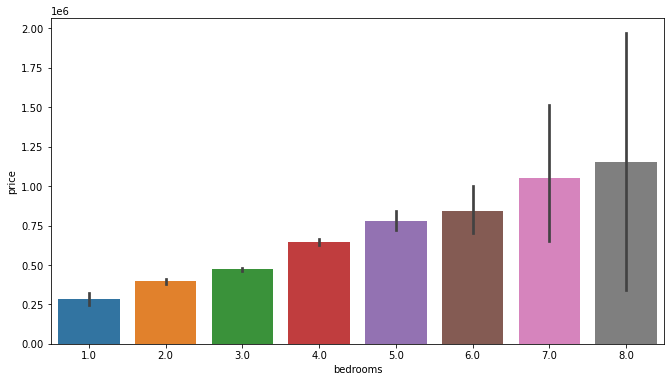

In [522]:
plt.figure(figsize=((11,6)))
sns.barplot(data["bedrooms"], data["price"])    # show data 
# problem1 : linear relation except (houses with 9 rooms )
# prolem2 : large price_range (houses with 8 rooms)

In [523]:
model = LinearRegression()     # model 
x = data.drop(["price","date","street","city","statezip","country"],axis = 1)     
# x = all data except the value the will be predicted and (data with type object) (axis = 1 to drop the columns)
y = data["price"]      # value that will be predicted 
model.fit(x,y)        # fit data
model.score(x,y)      # compute accurecy 

0.5645065821934105

In [524]:
data["bedrooms"].value_counts().sort_index()

1.0      37
2.0     540
3.0    1962
4.0    1469
5.0     326
6.0      59
7.0      14
8.0       2
Name: bedrooms, dtype: int64

In [525]:
data ["bedrooms"] = np.where(data ["bedrooms"]>7,7,data ["bedrooms"])

c:\Users\SkyTop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='price'>

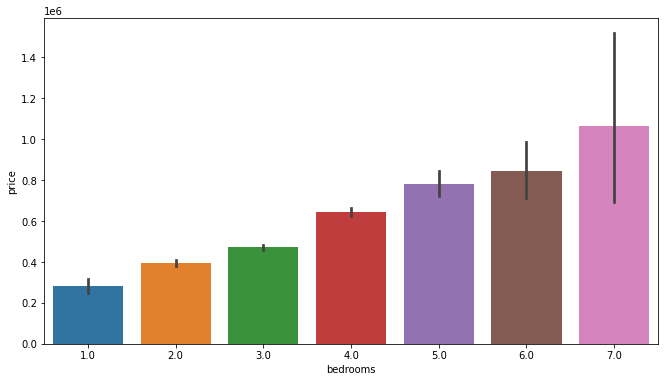

In [526]:
plt.figure(figsize=((11,6)))
sns.barplot(data["bedrooms"], data["price"])      # after clip data at 7

c:\Users\SkyTop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bathrooms', ylabel='price'>

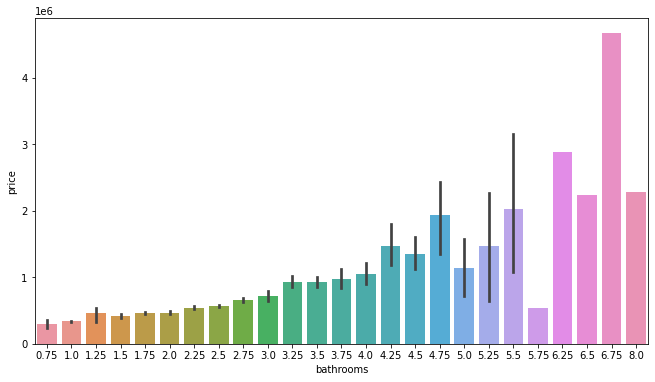

In [527]:
plt.figure(figsize=((11,6)))
sns.barplot(data["bathrooms"], data["price"])

In [528]:
data["bathrooms"].value_counts().sort_index()

0.75      17
1.00     714
1.25       3
1.50     281
1.75     606
2.00     413
2.25     400
2.50    1139
2.75     267
3.00     159
3.25     128
3.50     157
3.75      34
4.00      21
4.25      21
4.50      24
4.75       7
5.00       5
5.25       4
5.50       4
5.75       1
6.25       1
6.50       1
6.75       1
8.00       1
Name: bathrooms, dtype: int64

In [529]:
data ["bathrooms"] = np.where(data ["bathrooms"]==1.25,1,data ["bathrooms"])
data ["bathrooms"] = np.where(data ["bathrooms"]==.75,1,data ["bathrooms"])  # handel small number of houses
data ["bathrooms"] = np.where(data ["bathrooms"]>4.25,4.25,data ["bathrooms"])

data["bathrooms"].value_counts().sort_index()

1.00     734
1.50     281
1.75     606
2.00     413
2.25     400
2.50    1139
2.75     267
3.00     159
3.25     128
3.50     157
3.75      34
4.00      21
4.25      70
Name: bathrooms, dtype: int64

c:\Users\SkyTop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bathrooms', ylabel='price'>

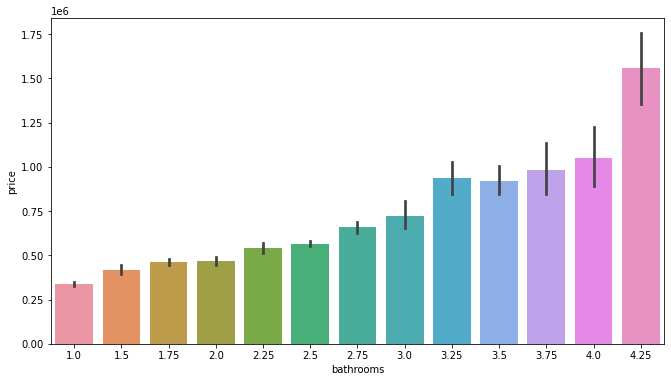

In [530]:
plt.figure(figsize=((11,6)))
sns.barplot(data["bathrooms"], data["price"])

<AxesSubplot:>

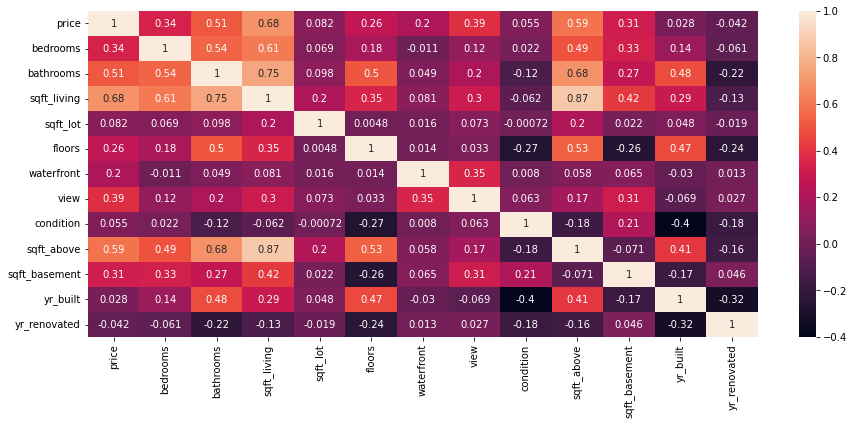

In [531]:
plt.figure(figsize=((15,6)))    # maximize figure size  
sns.heatmap(data.corr(),annot=True)    # visualization with colors

In [532]:
data = data.drop(["sqft_lot","yr_built","yr_renovated","condition","sqft_above"], axis = 1)

<AxesSubplot:>

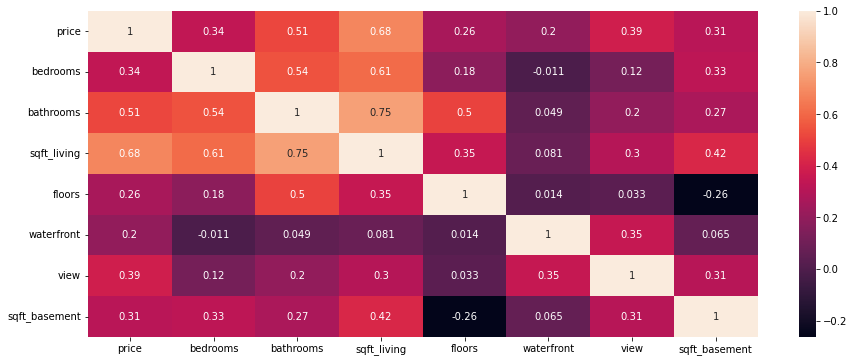

In [533]:
plt.figure(figsize=((15,6)))    # maximize figure size  
sns.heatmap(data.corr(),annot=True)    # visualization with colors

In [534]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4409 entries, 0 to 4599
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4409 non-null   object 
 1   price          4409 non-null   float64
 2   bedrooms       4409 non-null   float64
 3   bathrooms      4409 non-null   float64
 4   sqft_living    4409 non-null   float64
 5   floors         4409 non-null   float64
 6   waterfront     4409 non-null   float64
 7   view           4409 non-null   float64
 8   sqft_basement  4409 non-null   float64
 9   street         4409 non-null   object 
 10  city           4409 non-null   object 
 11  statezip       4409 non-null   object 
 12  country        4409 non-null   object 
dtypes: float64(8), object(5)
memory usage: 611.3+ KB


In [535]:
data = data.drop(["country","date"],axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4409 entries, 0 to 4599
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4409 non-null   float64
 1   bedrooms       4409 non-null   float64
 2   bathrooms      4409 non-null   float64
 3   sqft_living    4409 non-null   float64
 4   floors         4409 non-null   float64
 5   waterfront     4409 non-null   float64
 6   view           4409 non-null   float64
 7   sqft_basement  4409 non-null   float64
 8   street         4409 non-null   object 
 9   city           4409 non-null   object 
 10  statezip       4409 non-null   object 
dtypes: float64(8), object(3)
memory usage: 542.4+ KB


In [536]:
data["street"].nunique()     # large >> drop 

4337

In [537]:
data["city"].nunique()     # small 

44

In [538]:
data["statezip"].nunique()

77

c:\Users\SkyTop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city', ylabel='price'>

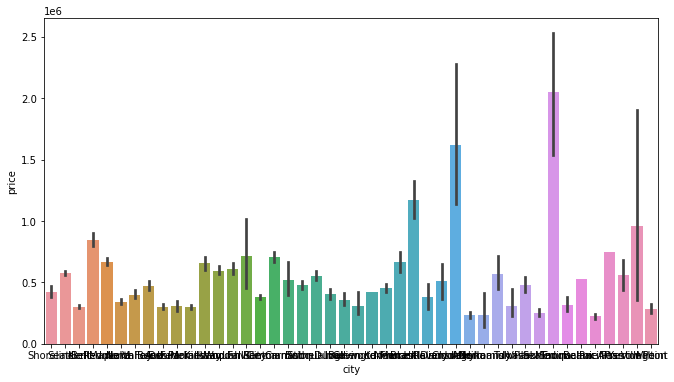

In [539]:
plt.figure(figsize=((11,6)))
sns.barplot(data["city"], data["price"])

c:\Users\SkyTop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='statezip', ylabel='price'>

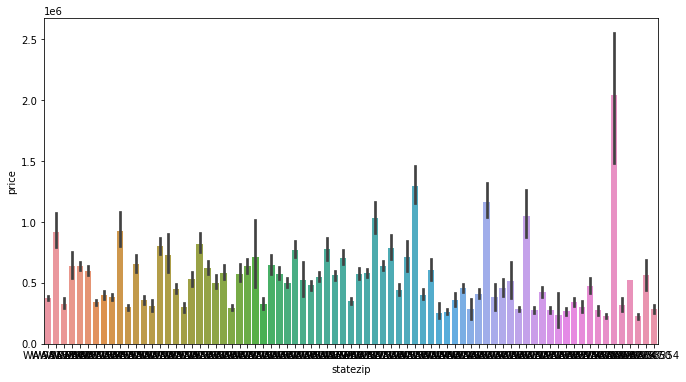

In [540]:
plt.figure(figsize=((11,6)))
sns.barplot(data["statezip"], data["price"]) 
 # linear relation is not important (with (nan))

In [541]:
data = data.drop(["street"],axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4409 entries, 0 to 4599
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4409 non-null   float64
 1   bedrooms       4409 non-null   float64
 2   bathrooms      4409 non-null   float64
 3   sqft_living    4409 non-null   float64
 4   floors         4409 non-null   float64
 5   waterfront     4409 non-null   float64
 6   view           4409 non-null   float64
 7   sqft_basement  4409 non-null   float64
 8   city           4409 non-null   object 
 9   statezip       4409 non-null   object 
dtypes: float64(8), object(2)
memory usage: 507.9+ KB


In [542]:
data = pd.get_dummies(data,columns=["statezip","city"])   # one hot_encoding
    # 0 , 1   and combine this features with data

In [543]:
data

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_basement,statezip_WA 98001,statezip_WA 98002,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,3.130000e+05,3.0,1.50,1340.0,1.5,0.0,0.0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2.384000e+06,5.0,2.50,3650.0,2.0,0.0,4.0,280.0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3.420000e+05,3.0,2.00,1930.0,1.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.200000e+05,3.0,2.25,2000.0,1.0,0.0,0.0,1000.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5.500000e+05,4.0,2.50,1940.0,1.0,0.0,0.0,800.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510.0,1.0,0.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0
4596,5.343333e+05,3.0,2.50,1460.0,2.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4597,4.169042e+05,3.0,2.50,3010.0,2.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4598,2.034000e+05,4.0,2.00,2090.0,1.0,0.0,0.0,1020.0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [544]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4409 entries, 0 to 4599
Columns: 129 entries, price to city_Yarrow Point
dtypes: float64(8), uint8(121)
memory usage: 960.0 KB


In [545]:
model = LinearRegression()     # model 
x = data.drop(["price"],axis = 1)     
# x = all data except the value the will be predicted and (data with type object) (axis = 1 to drop the columns)
y = data["price"]      # value that will be predicted 
model.fit(x,y)        # fit data
model.score(x,y)      # compute accurecy 

0.7630705671137925